In [14]:
import torch
import torch.nn as nn 
from torchvision import models, datasets, transforms
from torchvision.models import ResNet50_Weights
from torch.utils.data import DataLoader

import koreanize_matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import random_split

import sys
sys.path.append('C:\WorkSpace\KDT\TORCH_IMAGE\MyModule\MyModule')
from KDTModule import *

In [15]:
# 이미지 전처리(transform) 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),          # 텐서로 변환
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet 정규화 값
])

# ImageFolder 사용
ROOT_PATH = '../../../LocalData/pj_09_DL/train'
DS = datasets.ImageFolder(root=ROOT_PATH, transform=transform)

# DataLoader
DL = DataLoader(DS, batch_size = 32, shuffle=True)

print(DS.classes)
print(f'데이터 개수 : {len(DL.dataset)}')

['1', '2', '3', '4', '5']
데이터 개수 : 105


In [16]:
dataset_size = len(DS)
train_size = int(0.8 * dataset_size)
valid_size = dataset_size - train_size

# train, valid 나누기
train_dataset, valid_dataset = random_split(DS, [train_size, valid_size])

In [17]:
trainDL = DataLoader(train_dataset, batch_size = 32)
validDL = DataLoader(valid_dataset, batch_size = 32)

print(f"[train] : {len(trainDL.dataset)}, [test] : {len(validDL.dataset)}")

[train] : 84, [test] : 21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


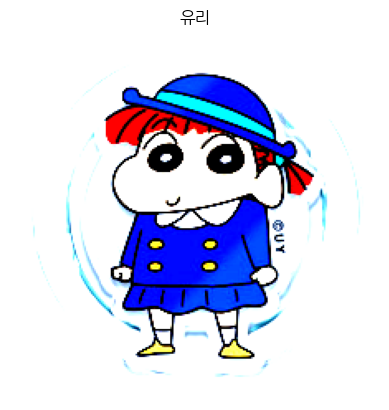

In [19]:
name_dict = {0 : '짱구', 1 : '철수', 2: '훈이' , 3 : '맹구', 4 : '유리'}

INDEX = 100

a = DL.dataset[INDEX][0].permute(1,2,0)
plt.axis('off')
plt.title(name_dict[DL.dataset[INDEX][1]])
plt.imshow(a)
plt.rcParams['font.family'] == 'AppleGothic'
plt.show()

In [7]:
# 미리 학습된 ResNet 모델 불러오기 (weight 사용)
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
#model = models.vgg19_bn(*, weights: Optional[VGG19_BN_Weights] = None, progress: bool = True, **kwargs: Any)

# 합성곱층 가중치 고정
for param in model.parameters():
    param.requires_grad = False

# 전결합층 가중치 변경하도록 설정
for param in model.fc.parameters():
    param.requires_grad = True

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\LG/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%


In [8]:
# 마지막 레이어 (full connected layer) 교체 (클래스 5개로 변경)
num_features = model.fc.in_features # 2048
model.fc = nn.Linear(num_features, 5) # 입력은 이전 층의 아웃을 그대로 받고 출력은 방법대 인원

# 손실 함수와 옵티마이저 정의
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

In [9]:
trainDL.dataset[0][0].shape

torch.Size([3, 224, 224])

In [10]:
trainDL.dataset[0][1]

0

In [11]:
EPOCH = 100
SAVE_PATH = '../../../LocalData/pj_09_DL/model'

training(trainDL, validDL, model, model_type = 'multiclass', optimizer = optimizer,
         epoch = EPOCH, endurance_cnt = 10, view_epoch = 1, num_classes = 5, SAVE_PATH = SAVE_PATH)

[EPOCH] : 1에서 모델 저장 완료.
[Loss : 1/100] Train : 1.6252, Test : 1.7666
[Score  : 1/100] Train : 0.3583, Test : 0.4762
[EPOCH] : 2에서 모델 저장 완료.
[Loss : 2/100] Train : 1.3890, Test : 1.5112
[Score  : 2/100] Train : 0.4833, Test : 0.4286
[EPOCH] : 3에서 모델 저장 완료.
[Loss : 3/100] Train : 1.1775, Test : 1.3938
[Score  : 3/100] Train : 0.6604, Test : 0.6190
[EPOCH] : 4에서 모델 저장 완료.
[Loss : 4/100] Train : 1.0414, Test : 1.1924
[Score  : 4/100] Train : 0.7125, Test : 0.5238
[EPOCH] : 5에서 모델 저장 완료.
[Loss : 5/100] Train : 0.8815, Test : 1.1791
[Score  : 5/100] Train : 0.6646, Test : 0.5714
[EPOCH] : 6에서 모델 저장 완료.
[Loss : 6/100] Train : 0.7760, Test : 1.1572
[Score  : 6/100] Train : 0.6812, Test : 0.5714
[EPOCH] : 7에서 모델 저장 완료.
[Loss : 7/100] Train : 0.6618, Test : 1.1226
[Score  : 7/100] Train : 0.7729, Test : 0.6190
[EPOCH] : 8에서 모델 저장 완료.
[Loss : 8/100] Train : 0.5927, Test : 1.0790
[Score  : 8/100] Train : 0.8312, Test : 0.6190
[EPOCH] : 9에서 모델 저장 완료.
[Loss : 9/100] Train : 0.5358, Test : 1.0339
[Sc

KeyboardInterrupt: 